# Detailed Report Data Cleaning

Objective: The objective of this script is to clean and standardize data from Movement Reports and create a consolidated dataset with relevant information while removing duplicates and unnecessary columns.

The raw data had following limitations:

Complex format that is reader friendly but not for data processing
Empty metrics
Weird concatenations
Merged rows & columns
Cleaned data will then be used for visualisation to draw trends & analysis, as well as prediction models.

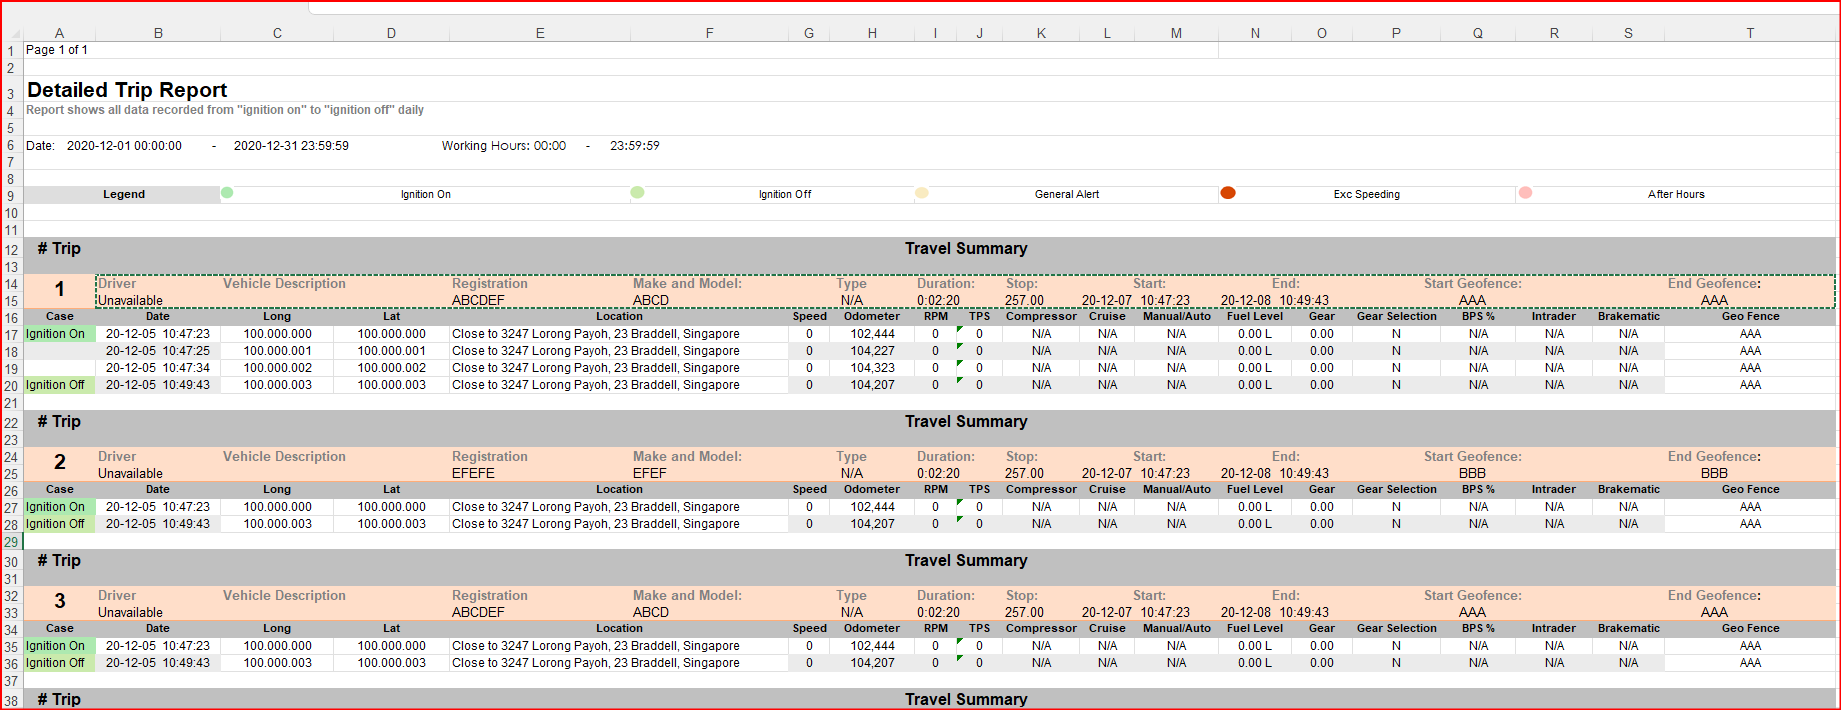

In [1]:
from IPython.display import Image
Image(filename='Detailed Trip Report Sample.png')
#Data has been replaced with dummy data

__Import necessary libraries & understand the intial imported format__

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from numpy import nan

# Set pandas option to display full column width
pd.set_option("display.max_colwidth", -1)

# Read multiple Excel files into dataframes, skipping the first 15 rows in each file
df11 = pd.read_excel("Detail Trip Report 31-10-2020.xls", skiprows=15)
df12 = pd.read_excel("Detail Trip Report 31-12-2020.xls", skiprows=15)

# Combine all dataframes into one
frames = [df11, df12]
combined = pd.concat(frames, sort=False)
original = combined  # Store a copy for reference

# Display the first 10 rows of the combined dataframe
combined.head(10)

# Save the combined dataframe to a CSV file without the index column
combined.to_csv('Combined_Detail_Trip_Report.csv', index=False)

# Reset the index of the combined dataframe and drop the old index column
combined = combined.reset_index().drop('index', axis=1)

# Display information about the combined dataframe, including column data types and non-null counts
combined.info()

__Remove useless columns__

In [ ]:
# Create a new dataframe 'ef' by copying 'combined'
ef = combined

# Select specific columns in 'ef'
ef = ef[['Case', 'Date', 'Long', 'Lat', 'Odometer', 'Location', 'Speed']]

# Filter rows where the 'Date' column is not null
ef = ef[ef['Date'].notna()]

# Display the first 10 rows of the 'ef' dataframe
ef.head(10)

__Remove useless rows__

In [ ]:
# Create a new dataframe 'ff' by filtering out rows where 'Date' is "Driver" or "Date"
ff = ef[(ef['Date'] != "Driver")]
ff = ff[ff['Date'] != "Date"]

# Display the first 20 rows of the 'ff' dataframe
ff.head(20)

# Print a specific range of rows from the 'ff' dataframe (rows 37050 to 37090)
print(ff.iloc[37050:37090])

# Reset the index of the 'ff' dataframe and drop the old index column
ff = ff.reset_index().drop('index', axis=1)

# Display information about the 'ff' dataframe
ff.info()

__Create "calculated" metrics & add as new column__

In [ ]:
# Initialize a variable 'add_index' for tracking index while iterating
for ind, row in ff.iterrows():
    print(ind, end="\r")
    
    # Check if the 'Location' column is 'nan' and store the current index
    if str(row['Location']) == 'nan':
        add_index = ind
    
    # Check if the length of 'Location' is less than 10 and it's not 'nan'
    # If true, update 'Location' using the value stored in 'add_index'
    if len(str(row['Location'])) < 10 and str(row['Location']) != 'nan':
        ff.at[add_index, 'Location'] = row['Location']

# Create a new column 'Trip' in the 'ff' dataframe and initialize it with an empty string
ff['Trip'] = ""

# Display the first 10 rows of the 'ff' dataframe
ff.head(10)

__Fix the trip formats__

In [ ]:
# Create a copy of 'ff' called 'gf'
gf = ff

# Initialize variables for counting trips and archiving 'Location'
count = 1
archive = ""

# Iterate through rows in 'gf'
for ind, row in gf.iterrows():
    print(ind, end="\r")
    
    # Check if the 'Case' column is "# Trip"
    if str(row['Case']) == "# Trip":
        count += 1
        
        # Check if 'Location' is not in the specified list, if not, pass
        # Since there are only 4 types of cars, anything outside the list is an error
        if str(row['Location']) not in ["A", "B", "C", "D"]:
            pass
        else:
            archive = str(row['Location'])
    
    # Update the 'Trip' column with the current trip count
    gf.at[ind, 'Trip'] = count
    
    # Check if 'Location' is not in the specified list, if not, update 'Location' with 'archive'
    # Since there are only 4 types of cars, anything outside the list is an error
    if str(row['Location']) not in ["A", "B", "C", "D"]:
        gf.at[ind, 'Location'] = archive


__Check through rows without date__

In [ ]:
# Filter out rows where 'Date' is "Unavailable"
gf = gf[gf['Date'] != "Unavailable"]

# Reset the index of the 'gf' dataframe and drop the old index column
gf = gf.reset_index().drop('index', axis=1)


__Rename the columns of the 'gf' dataframe__

In [ ]:
# Rename the columns of the 'gf' dataframe
gf.columns = ['Case', 'Date', 'Long', 'Lat', 'Odometer', 'Registration', 'Speed', 'Trip']

# Display the 'gf' dataframe
gf

__Iterate through and if 'Registration' is empty, fill it with car "A"__

In [ ]:
# Iterate through rows in 'gf' where 'Registration' is empty and fill it with "A"
for ind, row in gf[gf['Registration'] == ""].iterrows():
    print(ind, end="\r")
    gf.at[ind, 'Registration'] = "A"

# Display the 'gf' dataframe with filled 'Registration' values
gf

__Checking prepared data__

In [ ]:
# Group and count the occurrences of each unique value in the 'Registration' column
gf.groupby('Registration')['Registration'].count()

# Group and count the occurrences of each unique value in the 'Case' column
gf.groupby('Case')['Case'].count()

# Display information about the 'gf' dataframe
gf.info()

__Save in csv format__

In [ ]:
# Save the 'gf' dataframe to a CSV file without the index column
gf.to_csv('Detail_Trip_Report_final.csv', index
